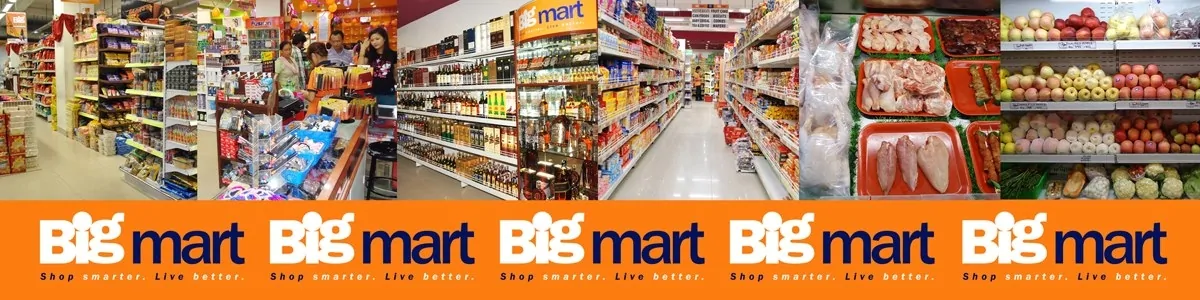

# Executive Summary :
We live in a uncertain world but just because the world is uncertain does'nt mean that our company cannot be the most consistent, most profitable, and the most successful company amoung all of our competitors. So with that being said, we will go into detail about the data that we have/collected, and use it to make the best of all our assets and bring long-term success for our company.

Company description - Big Mart is a general merchandise retailer selling products through its stores and digital channels. Its general merchandise stores offer an edited food assortment, including perishables, dry grocery, dairy and frozen items. 

Market Analysis - The global food and grocery retail market size was valued at USD 11.7 trillion in 2019 and is expected to grow at a compound annual growth rate (CAGR) of 5.0% from 2020 to 2027. Increased disposable income as a result of economic growth has fueled the spending on consumables. The pandemic has uncovered gaps in distribution, packaging and sales, which have led to an increase in product shortages and stressed consumers. We’ve seen a definite movement toward [product] optimization as a result of COVID from food, beverage and snacks to cleaning products

Marketing plan - Currently the marketing plan for Big Mart, a mix of using our slogan of "Everyday Fresh", which will be displayed in our Ads in the paper, Facebook, Instagram, and other large social media platforms. In addition to Ads, we will also be reaching out to the communities in which our locations are to establish a great working relationship with each location.

Financial projections - The end goal of this data will be to increase sales to at least 5% per year, and to recap on past data collection's to improve the future growth of the company.

# Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
from matplotlib import cm
import matplotlib.colors as col
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Mounted Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Raw data

In [4]:
df = pd.read_csv('/content/drive/MyDrive/PTDataScience/PandasForDataManipulation/sales_predictions.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [63]:
df.shape

(8523, 11)

#**Variable**	|  **Description**

Item_Identifier  	| Unique product ID

Item_Weight       | Weight of product

Item_Fat_Content  |	Whether the product is low fat or not

Item_Visibility 	|  The % of total display area of all products in a store 
allocated to the particular product

Item_Type	        |   The category to which the product belongs
Item_MRP	        | Maximum Retail Price (list price) of the product

Outlet_Identifier	| Unique store ID

Outlet_Establishment_Year	| The year in which store was established

Outlet_Size	      | The size of the store in terms of ground area covered

Outlet_Location_Type |	The type of city in which the store is located

Outlet_Type	      | Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales	| Sales of the product in the particulat store. This is the outcome variable to be predicted.

# NaN replaced with "None"
Now the data with ***NaN*** is gone and replaced with ***none*** for future work

The reason for replacing the NaN with none is, because I feel that it is easier for me to call on them for later workings and graphs. So this is not completely needed but it is just a preference of mine. Plus the column with the most NaN values are represented as a Data type of Object.


In [6]:
df.fillna("None", inplace=True)

In [8]:
df.head(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,None,Tier 3,Grocery Store,732.3800


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ItemID          8523 non-null   object 
 1   ItemWeight      8523 non-null   float64
 2   ItemFatC        8523 non-null   object 
 3   ItemVis         8523 non-null   float64
 4   ItemType        8523 non-null   object 
 5   ItemMRP         8523 non-null   float64
 6   OutletId        8523 non-null   object 
 7   OutletYear      8523 non-null   int64  
 8   OutletLocation  8523 non-null   object 
 9   OutletType      8523 non-null   object 
 10  OutletSales     8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 799.0+ KB


In [38]:
#This is to change the data type of the ItemWeight to an Int/float instead of an object
df['ItemWeight'].astype(dtype=int)

0        9
1        5
2       17
3       19
4        8
        ..
8518     6
8519     8
8520    10
8521     7
8522    14
Name: ItemWeight, Length: 8523, dtype: int64

#Renaming the Data!
To avoid a mess up, I labeled each one with the exact name to represent the info given!

In [9]:
df.rename(columns={'Item_Identifier': 'ItemID', 'Item_Weight': 'ItemWeight', 'Item_Fat_Content': 'ItemFatC', 'Item_Visibility': 'ItemVis', 'Item_Type': 'ItemType' }, inplace=True)
df.rename(columns={'Item_MRP': 'ItemMRP', 'Outlet_Identifier': 'OutletId', 'Outlet_Establishment_Year': 'OutletYear', 'Outlet_Size': 'OutletSize', 'Outlet_Location_Type': 'OutletLocation' }, inplace=True)
df.rename(columns={'Outlet_Type': 'OutletType', 'Item_Outlet_Sales': 'OutletSales' }, inplace=True)
df.head(1)

,ItemID,ItemWeight,ItemFatC,ItemVis,ItemType,ItemMRP,OutletId,OutletYear,OutletSize,OutletLocation,OutletType,OutletSales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [10]:
df.tail(1)

,ItemID,ItemWeight,ItemFatC,ItemVis,ItemType,ItemMRP,OutletId,OutletYear,OutletSize,OutletLocation,OutletType,OutletSales
8522,DRG01,14.8,Low Fat,0.044878,Soft Drinks,75.467,OUT046,1997,Small,Tier 1,Supermarket Type1,765.67


# Fixing Syntax or spelling errors

In [11]:
df.duplicated().any()

False

In [12]:
df['ItemFatC'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: ItemFatC, dtype: int64

In [13]:
#This is to replace the names of the fat content
df.replace('LF', 'Low Fat', inplace=True)
df.tail(5)

,ItemID,ItemWeight,ItemFatC,ItemVis,ItemType,ItemMRP,OutletId,OutletYear,OutletSize,OutletLocation,OutletType,OutletSales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.38,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,None,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.6,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.21,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.8,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [14]:
#This is to replace the names of the fat content
df.replace('reg', 'Regular', inplace=True)
df.tail(5)

,ItemID,ItemWeight,ItemFatC,ItemVis,ItemType,ItemMRP,OutletId,OutletYear,OutletSize,OutletLocation,OutletType,OutletSales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.38,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,None,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.6,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.21,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.8,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [15]:
#This is to replace the names of the fat content
df.replace('low fat', 'Low Fat', inplace=True)
df.head(5)

,ItemID,ItemWeight,ItemFatC,ItemVis,ItemType,ItemMRP,OutletId,OutletYear,OutletSize,OutletLocation,OutletType,OutletSales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,None,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#Number of unique values 

In [18]:
#Shows the number of each group of foods
df['ItemType'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: ItemType, dtype: int64

#From here I'm trying to get an Idea of the None/0 values!
So what I decided on doing is to grouping the none into a variable and trying to tackle the information that way! The first bar chart is to see if one item has more none values than others and going from there. 




In [19]:
#NoneError = (df['OutletSize'] == 'None') == True
#NoneError.sum()

In [20]:
#NoneError.sum()
#fig=plt.figure(figsize=(20,5))

#df.loc[NoneError, 'ItemType'].hist(bins = 20, edgecolor='black', color ='red');
#plt.xticks(rotation = 45)
#plt.ylabel('Number of None Values', fontsize =15)
#plt.xlabel('Item Types', fontsize =15)
#plt.legend('Errors of each type',fontsize = 10)

#plt.ticklabel_format(useOffset=False, style='plain',  axis='y')

In [74]:
df.apply(lambda x: len(x.unique()))

ItemID            1559
ItemWeight         416
ItemFatC             2
ItemVis           7880
ItemType            16
ItemMRP           5938
OutletId            10
OutletYear           9
OutletLocation       3
OutletType           4
OutletSales       3493
dtype: int64

In [76]:
item_avg_weight = df.pivot_table(values='ItemWeight', index='ItemID')
#Determine the average weight per item

In [78]:
#Get a boolean variable specifying missing Item_Weight values
miss_bool = df['ItemWeight'].isnull()

In [86]:
item_avg_weight

,ItemWeight
ItemID,
DRA12,11.600000
DRA24,13.821429
DRA59,6.202500
DRB01,4.926667
DRB13,6.115000
...,...
NCZ30,5.648571
NCZ41,19.850000
NCZ42,10.500000


# Dropping None Rows
Now that I've gotten the info that I needed, I can drop all the None values with the code below. The reason being because I would like to highlight very specific things and because the data that is contained in the row which include None/0 values are inconsisent with the data across the entire dataframe. 

**NOTE:** *This is not actually dropping the data in the full data frame but instead dropping it within my new data frame for the future.*

In [21]:
#Creating a new data frame to show the info with None
df = df[df.OutletSize != 'None']

In [22]:
df.head(6)

,ItemID,ItemWeight,ItemFatC,ItemVis,ItemType,ItemMRP,OutletId,OutletYear,OutletSize,OutletLocation,OutletType,OutletSales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,0,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [23]:
#Creating yet another to apply the droppping of data, So that we can keep the overall dataframe in order.
df_dro = df.drop(columns = ['OutletSize'], 
 inplace = True)

#Grouping OutletTypes


In [24]:
#Grouping the supermarket types by types
Outlettype_df = (df['OutletType'] == 'Supermarket Type1') == True
Outlettype_df1 = (df['OutletType'] == 'Supermarket Type2') == True
Outlettype_df2 = (df['OutletType'] == 'Grocery Store') == True

#Supermarket Groups 

In [28]:
df1 = (df['OutletType'] == 'Supermarket Type1') & (df['OutletLocation'] == 'Tier 1') == Outlettype_df
df2 = (df['OutletType'] == 'Supermarket Type1') & (df['OutletLocation'] == 'Tier 2') == Outlettype_df1
df3 = (df['OutletType'] == 'Supermarket Type1') & (df['OutletLocation'] == 'Tier 3') == Outlettype_df2

In [29]:
df1.sum()
# So with all the info there are 4806 that match the above for DF1

4806

In [30]:
df2.sum()
# So with all the info there are 4810 that match the above for DF2

4810

In [31]:
df3.sum()
# So with all the info there are 6508 that match the above for DF3

6508

# So in total:
we have 5577 Supermarket Type 1

we have 928 Supermarkets Type 2

we have 1083 Grocery Store's

In [25]:
Outlettype_df.sum()

5577

In [26]:
Outlettype_df1.sum()

928

In [27]:
Outlettype_df2.sum()

1083

#Grouping By The Years
Grouping this data allows us to get a better idea of the sales for each year!
Lets take a deep look at the year : 1998

1998 - events: 
  

1. **Dow Jones drops over 500 points on August 31st on the New York Stock Exchange**
2. **Forest Fires in Florida force 120,000 to flee their homes**
3. **Tornadoes in central Florida destroy or damage 2,600 structures and kill 42**
4. **President Bill Clinton Impeached for perjury and obstruction of justice.**

As we can see there were a number of events to happen in the USA to count for the decrease sales in year of 1998. Which was then followed by 1999, in which the Dow Jones Industrial Average closes above 11,000 for the first time in history. Speaking of history things that happens in the world impact the overall market and will without a doubt impact the sales of this company. All that we can do in this regards is plan ahead and make a business plan for the these times, so that we can stay consistent thru these periods of up's and downs! 

*(**Refer to the Chart and PieChart below to get a better idea of the changes**)*





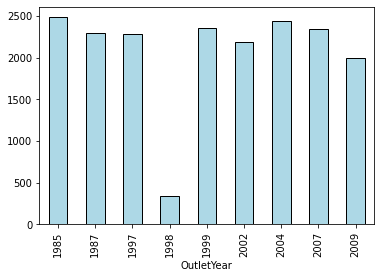

In [32]:
df.groupby("OutletYear")['OutletSales'].mean().plot(kind='bar', color= 'lightblue', edgecolor='black');
#This shows the Data by Sales to years or years to sales, but we can get more!

#Explaining the Charts and Graphs
*As you can see below our Outlet that is much bigger than the others had lower amounts of sales between the years 1990-2007. The reason being because "Not everyone wants to go to a large supercenter for everyday items that they may need. But with that being said no need to worry because most of the products in our supercenters are of a certain size and weight so being at an average of 1000 sales is not bad for the type of tier our supercenters are at. Also included is the change between 1980-1990 in a lightblue color .Below that is our pie chart showing the overall percentages of sales for each year between 1985-*2009*

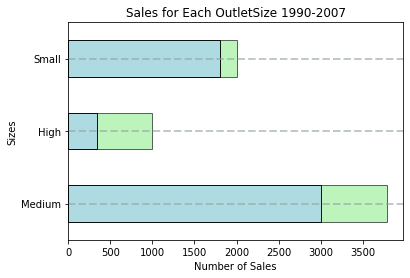

In [33]:
plotdata = pd.DataFrame(
    {"OutletSize": [3789,994, 2000]}, 
    index=["Medium", "High", "Small"] );
plotdata1 = pd.DataFrame(
    {"OutletSize": [3000,343,1800]}, 
    index=["Medium", "High", "Small"] );
plotdata['OutletSize'].plot(kind="barh", color= 'lightgreen', edgecolor='black', alpha=0.6);
plotdata1['OutletSize'].plot(kind="barh", color= 'lightblue', edgecolor='black', alpha=0.9);
plt.title("Sales for Each OutletSize 1990-2007");
plt.ylabel("Sizes");
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.6)
plt.xlabel("Number of Sales");

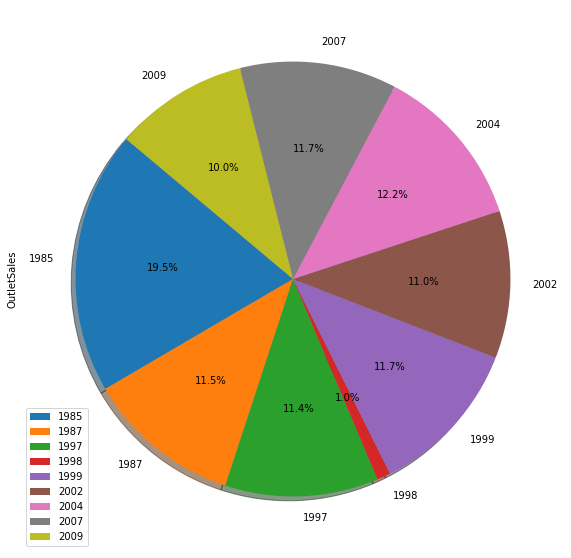

In [34]:

df.groupby(['OutletYear']).sum().plot(kind='pie', y='OutletSales', subplots=True, shadow = True, startangle=140, figsize=(15,10), autopct='%1.1f%%');


#Number of Each Food Sold
This bar chart will show the differences between the type of items sold at the markets, and show the overall number of each item sold for all the markets listed above, under this company!


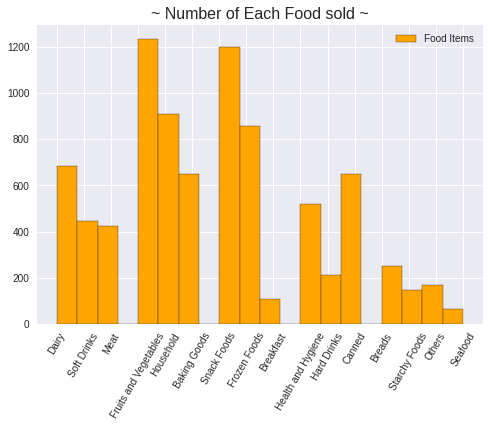

In [95]:
plt.style.use('seaborn')
df['ItemType'].hist(bins = 20,
  edgecolor='black', label='Food Items', color='orange');
plt.xticks(rotation = 60);
plt.title('~ Number of Each Food sold ~', fontsize = 16);
plt.legend();

#The % of total display area of all products in a store allocated to the particular product

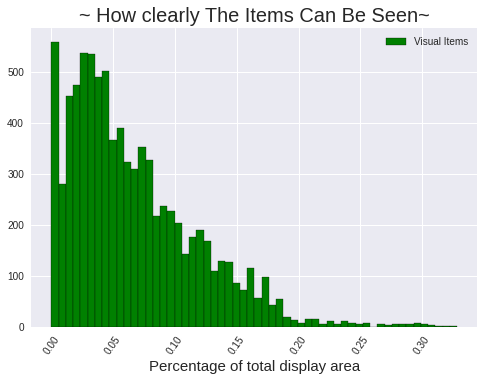

In [126]:
plt.style.use('seaborn')
df['ItemVis'].hist(bins = 56,
  edgecolor='black', label='Visual Items', color='green', align='mid',);
plt.xticks(rotation = 55);
plt.xlabel('Percentage of total display area', fontsize= 15)
plt.title('~ How clearly The Items Can Be Seen~', fontsize = 20);
plt.legend();
#The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.

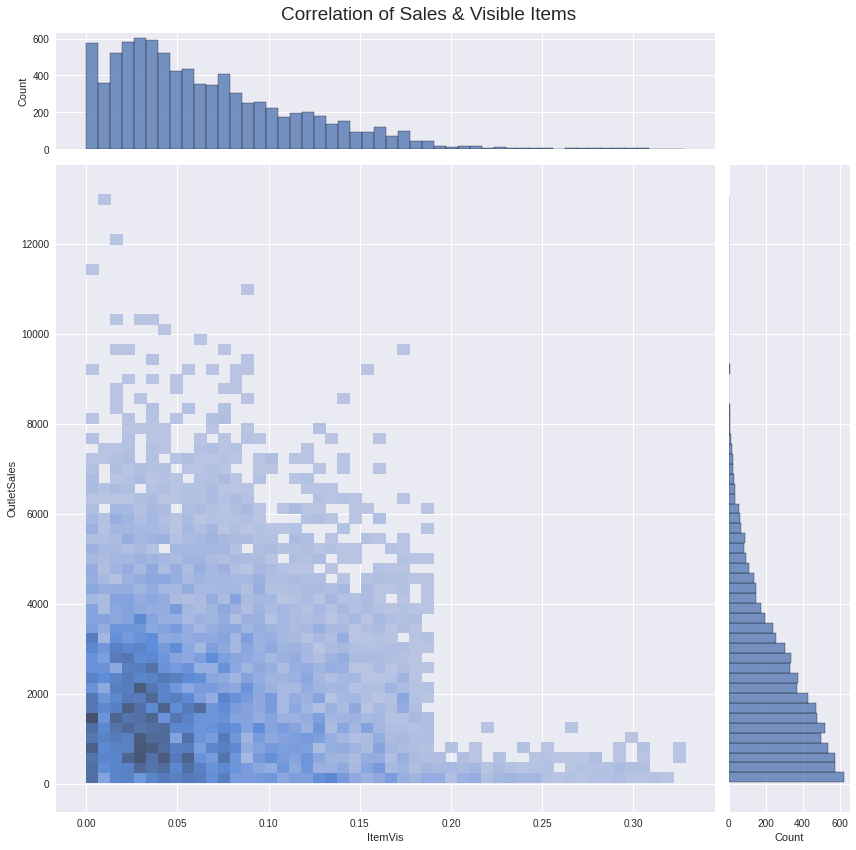

In [183]:
#Shows the connection between the Sales and Item vis in each tier/Location
p = sns.jointplot(x='ItemVis', y='OutletSales', data=df,height= 12, kind='hist', ratio=5, dropna=True, marginal_ticks=True);
p.fig.suptitle("Correlation of Sales & Visible Items", fontsize=19);
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)

#Boxplot!
The box plot is to represent each Item and how many were sold of each, and to highlight the most vauable Items that we sell!


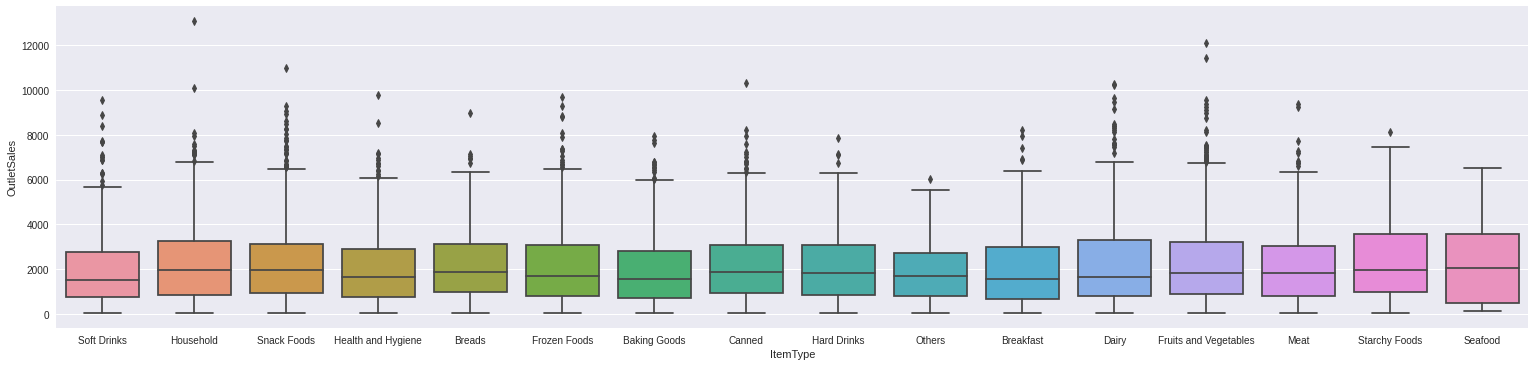

In [64]:
sns.catplot(y='OutletSales', x='ItemType', kind='box', data=df.sort_values('OutletSales')).fig.set_size_inches(25,5)

#Outlet ID vs Sales 
This box graph will give you a rough idea of the sales difference's between each Outlet. Outlet 027  has multiple Tier 3, Type 3 Supermarket. But its Important to keep in mind a large sum of the sales for outlet027 were in 1985.
Some of the events from 1985 included:


1. **United States -- Coldest Winter in Eastern U.S**
2. **US budget-balancing bill enacted**
3. **1985 Jan 22, A cold wave damaged 90% of Florida's citrus crop**
4. **1985 Feb 5, The US halted a loan to Chile in protest over human rights abuses**



*According to the report, average sales per U.S. supermarket store amounted to 17.39 million U.S. dollars in 2016. Perishables was the largest supermarket department in the U.S., accounting for 53.8 percent of sales*


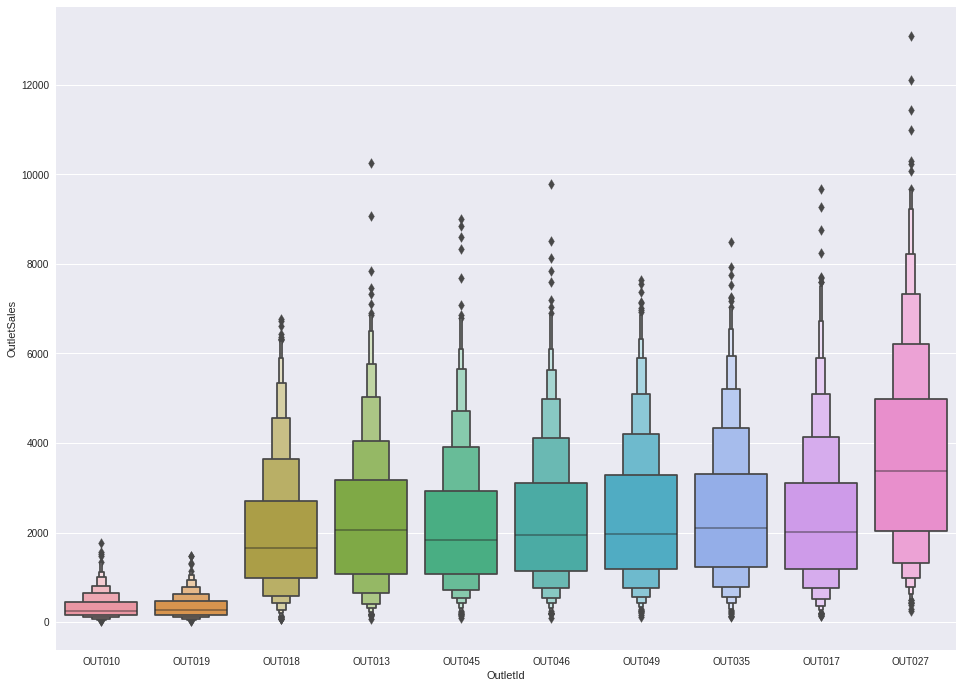

In [37]:
sns.catplot(y='OutletSales', x='OutletId', kind='boxen', data=df.sort_values('OutletSales')).fig.set_size_inches(15,10)

#Conclusion

*Big Mart is a stable company with a lot of growth potential. Big Mart is also an environmentally friendly company that follows socially responsible practices and is better perceived by consumers. Big Mart must keep pace with changing guest expectations and new developments within themarket. If Big Mart is unable to implement improvements to their guest-facing technology in atimely manner, their ability to compete could be affected drastically. Most importantly, Big Mart’s strategy needs to ensure continuous improvements to its ability to remain relevant to customers as a brand they trust. Meeting, and wherever possible, exceeding, customers expectations will require them to manage various strategic, operational, and reputational risks.*

**Recommendations :** 

*Implement a better re-stocking system to prevent running out of inventory. Point-of-sale stocking system. Remove the potential for human error and would be extremely fast and costefficient. Continue finding ways to enhance the customer’s shopping experience. Offer free food samples. Install price scanners throughout the store. Install store mannequins displaying the latest fashion trends.*

